In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

### 📊 Segmenting Mall Customers: A K-Means Clustering Approach 🎯

#### 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. Load the Dataset



In [3]:
data = pd.read_csv("Mall_customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### 3. Prepare the Data for Clustering



In [4]:
X = data.iloc[:, [3, 4]].values

#### 4. Plotting the Elbow Method Graph



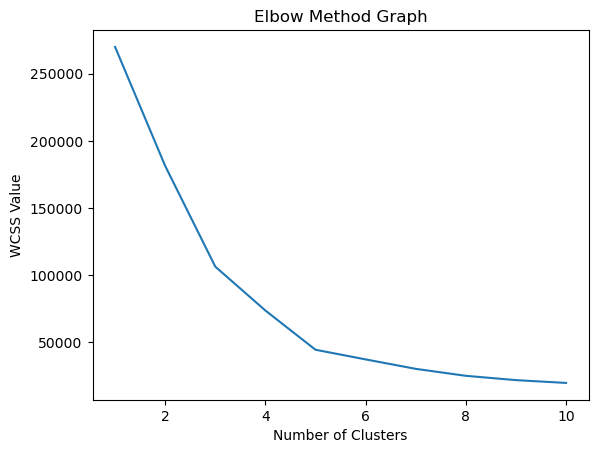

In [5]:
from sklearn.cluster import KMeans
w = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=52)
    kmeans.fit(X)
    w.append(kmeans.inertia_)

plt.plot(range(1, 11), w)
plt.title("Elbow Method Graph")
plt.ylabel("WCSS Value")
plt.xlabel("Number of Clusters")  
plt.show()

#### 5. Apply K-Means Clustering with the Optimal Number of Clusters




In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

In [7]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

#### 6. Plotting the Clusters



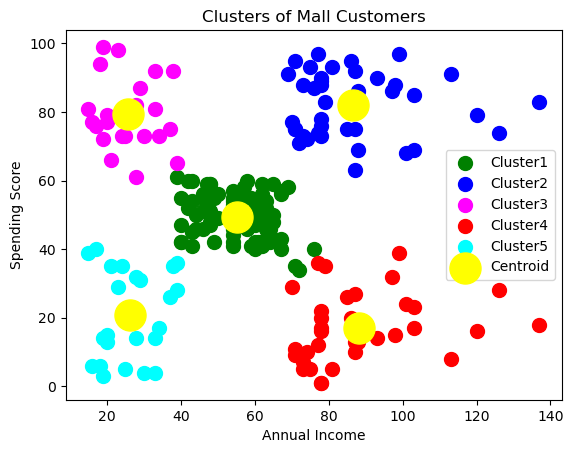

In [8]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=100, c='green', label='Cluster1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=100, c='blue', label='Cluster2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=100, c='magenta', label='Cluster3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s=100, c='red', label='Cluster4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s=100, c='cyan', label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500, c='yellow', label='Centroid')
plt.title("Clusters of Mall Customers")
plt.xlabel("Annual Income")  
plt.ylabel("Spending Score")  
plt.legend()
plt.show()